In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# The dataset 

The dataset we are using is the MNIST dataset which is a collection of grayscale images of handwritten numbers 0 through 9.
Our goal is to create a CNN model capable to accurately "read" handwritten numbers.

# 1. Exploring and Preprocessing the Data 

the dataset is available in tensorflow already :

In [4]:
from tensorflow.keras.datasets import mnist

it is already divided into training and testing datasets :

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() 

It is 60.000 images with 28x28 pixels

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
single_image = x_train[0]

In [8]:
single_image.shape

(28, 28)

In [9]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

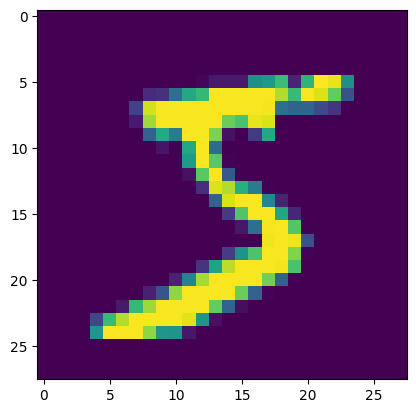

In [10]:
plt.imshow(single_image) #note the it uses the default color pallete of plt 

The labels are basically the numbers. We want to use one hot encoding to convert them into categories:

In [11]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [12]:
from tensorflow.keras.utils import to_categorical

In [13]:
y_train.shape

(60000,)

In [14]:
y_example = to_categorical(y_train)

In [15]:
y_example.shape

(60000, 10)

In [16]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Now we convert both the testing and the training labels : 

In [17]:
y_cat_test = to_categorical(y_test,num_classes=10)

In [18]:
y_cat_train = to_categorical(y_train,10)

As we saw earlier the image pixels have values between 0 and 255 :

In [19]:
single_image.max()

255

In [20]:
single_image.min()

0

We want to scale these between 0 and 1 => can be easily done by dividing the data by 255

In [21]:
x_train = x_train/255

In [22]:
x_test = x_test/255

In [23]:
scaled_image = x_train[0]

In [24]:
scaled_image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

The ratio of the values is still the same , therefore if we display the image it will still look the same :

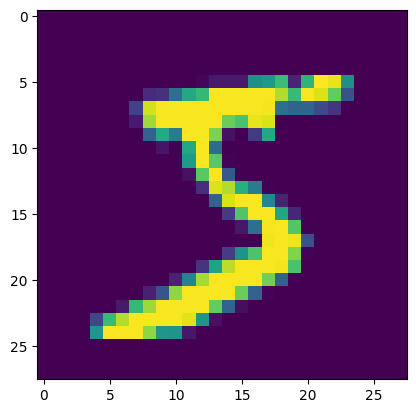

In [25]:
plt.imshow(scaled_image)

We want to add one more dimention to our data so that the system knows we are dealing with a single RGB channel -the images are in one color -

In [26]:
x_train.shape

(60000, 28, 28)

In [27]:
#(batch_size,width,height,color_channels)
x_train = x_train.reshape(60000, 28, 28, 1)

In [28]:
x_test.shape

(10000, 28, 28)

In [29]:
x_test = x_test.reshape(10000, 28, 28, 1)

# 2. Creating and Training the Model

In [34]:
from tensorflow.keras.models import Sequential

In [35]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

#### Convolution layer : 

We choose 32 filters as the images are pretty simple, we will go with a kernel size of 4x4 and because the images are 28x28 pixels we will choose the default stride of (1,1). For this reason, since a 4x4 with a stride of 1 will be able to cover the whole 28x28 image, we do not need padding. So we choose the default padding (ie 'valid') .

#### MaxPool2D layer : 

We choose a pool size that is half our kernel so (2,2) -it is the default-

#### Flatten : 

We flatten the input images from 28x28 to an array of 784 (28*28)

#### Dense : 

we choose a number of units on the same scale as our input (28x28=784) so in our case it would be somewhere between 0 and 1000, we chose 128

#### Output Layer :

We need 10 neurons as we have 10 classes and since it is a multiclass problem we use the softmax function

In [36]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28,28,1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

# Output Layer
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [37]:
from tensorflow.keras.callbacks import EarlyStopping

In [38]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [39]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1341 - accuracy: 0.9594 - val_loss: 0.0511 - val_accuracy: 0.9841
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0460 - accuracy: 0.9853 - val_loss: 0.0439 - val_accuracy: 0.9852
Epoch 3/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0297 - accuracy: 0.9909 - val_loss: 0.0409 - val_accuracy: 0.9865
Epoch 4/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0215 - accuracy: 0.9930 - val_loss: 0.0392 - val_accuracy: 0.9886
Epoch 5/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0144 - accuracy: 0.9956 - val_loss: 0.0390 - val_accuracy: 0.9881
Epoch 6/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0107 - accuracy: 0.9965 - val_loss: 0.0427 - val_accuracy: 0.9890
Epoch 7/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0087 - accuracy: 0.9969 - val_loss: 0.0439 -

In [40]:
metrics = pd.DataFrame(model.history.history)

In [41]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.134145,0.959417,0.051144,0.9841
1,0.046022,0.985333,0.043887,0.9852
2,0.029735,0.990883,0.040870,0.9865
3,0.021492,0.992967,0.039182,0.9886
4,0.014371,0.995567,0.038959,0.9881
5,0.010663,0.996500,0.042743,0.9890
6,0.008700,0.996850,0.043927,0.9882


By plotting the validation loss with the training loss we can see that the training loss kept reducing but the validation (at the end) began increasing which activated the early stopping

<AxesSubplot: >

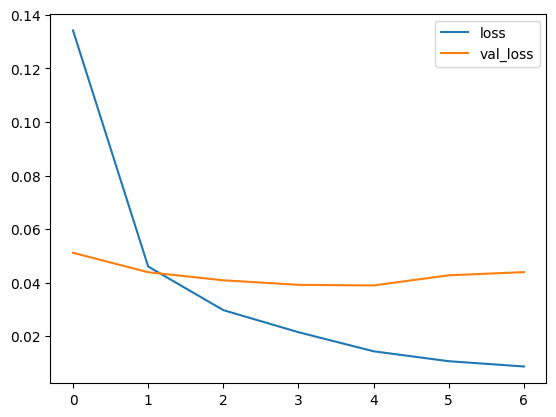

In [42]:
metrics[['loss','val_loss']].plot()

And here when we plot the equivalent accuracies we can see that the trainig accuracy almost reached 100% but the validation one began to level off 

<AxesSubplot: >

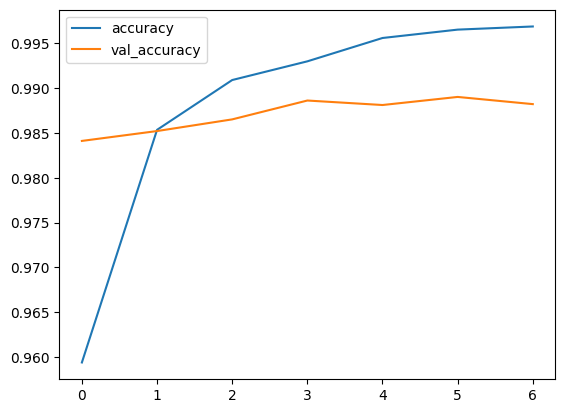

In [43]:
metrics[['accuracy','val_accuracy']].plot()

# 3. Evaluating the model

In [44]:
model.evaluate(x_test,y_cat_test,verbose=0)

[0.04392712563276291, 0.9882000088691711]

In [45]:
from sklearn.metrics import classification_report,confusion_matrix

In [53]:
predictions = (model.predict(x_test) > 0.5).astype("int32")

313/313 [==============================] - 1s 4ms/step


The predictions are now one hot encoded so we will turn them into labels just like the original y_test set is.

In [64]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [62]:
pred_non_cat = np.argmax(predictions,axis=1)

In [65]:
pred_non_cat

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

And now we can get our classification report : 

In [66]:
print(classification_report(y_test,pred_non_cat))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       1.00      0.98      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.97      0.98       974
           9       0.97      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [67]:
confusion_matrix(y_test,pred_non_cat)

array([[ 973,    0,    3,    1,    0,    0,    1,    0,    2,    0],
       [   1, 1131,    1,    0,    0,    0,    1,    1,    0,    0],
       [   2,    2, 1022,    1,    1,    0,    0,    3,    1,    0],
       [   1,    0,    1,  998,    0,   10,    0,    0,    0,    0],
       [   0,    0,    1,    0,  959,    0,    5,    0,    0,   17],
       [   0,    0,    0,    4,    0,  886,    1,    0,    1,    0],
       [   3,    2,    0,    1,    1,    2,  949,    0,    0,    0],
       [   1,    0,    6,    1,    0,    0,    0, 1015,    1,    4],
       [   4,    2,    3,    5,    0,    1,    1,    4,  949,    5],
       [   4,    0,    0,    4,    1,    5,    0,    1,    0,  994]],
      dtype=int64)

In [68]:
import seaborn as sns

<AxesSubplot: >

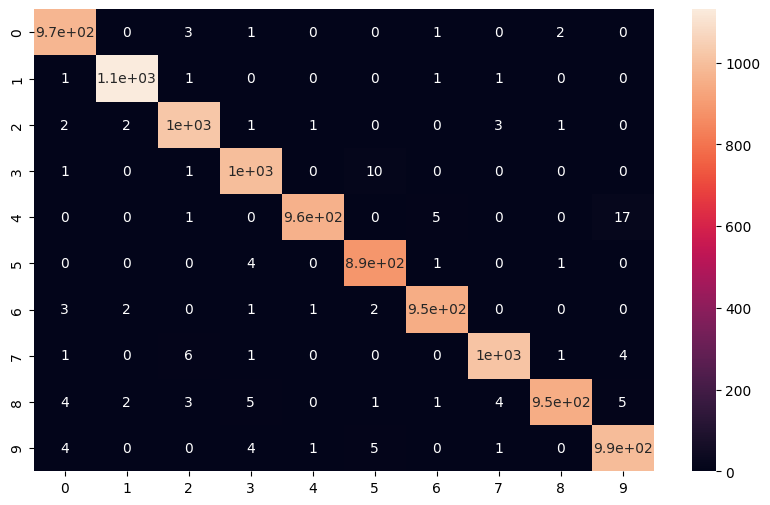

In [70]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,pred_non_cat),annot=True)

# 4. Prediction of a single image 

###### Let's assume we had one image of a number. Cna our model classify the number correctly ? 

We can grab the first image from the test set : 

In [71]:
my_number = x_test[0]

And we can see bellow that it is the number 7 : 

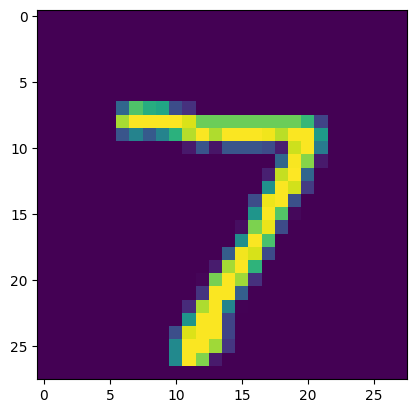

In [72]:
plt.imshow(my_number.reshape(28,28))

In [76]:
predict_number = (model.predict(my_number.reshape(1,28,28,1)) > 0.5).astype("int32")
print( np.argmax(predict_number,axis=1)) 

1/1 [==============================] - 0s 18ms/step
[7]


Our model predicted correctly ! 